In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import math


experiment_names = ['owl_exp_pure',
                    'owl_exp_mixed',
                    'strike_exp_pure',
                    'strike_exp_mixed',
                    'energy_gain_pure',
                    'energy_gain_mixed',
                    ]
totals = []
point_class_dfs = []
parameters = []
for label in experiment_names:
    file_path_pcs = '/home/mremington/Documents/uumarrty_post_sim/uumarrty_post_sim_analysis/per_cycle_analysis/nash_data/{}_point_classifacation.csv'.format(label)
    temp_exp_pc = pd.read_csv(file_path_pcs,header = 0, index_col=None)
    point_class_dfs.append(temp_exp_pc)
    for i in range(1,7):
        file_path_totals = '/home/mremington/Documents/uumarrty_exps/{}/exp{}/Data/totals.csv'.format(label,i)
        temp_exp_total = pd.read_csv(file_path_totals,header = 0, index_col=None)
        temp_exp_total['experiment_name'] = [label for i in range(len(temp_exp_total))]
        totals.append(temp_exp_total)
        file_path_parameters = '/home/mremington/Documents/uumarrty_exps/{}/exp{}/Data/parameters.csv'.format(label,i)
        temp_exp_par = pd.read_csv(file_path_parameters,header = 0, index_col=None)
        temp_exp_par['experiment_name'] = [label for i in range(len(temp_exp_par))]
        parameters.append(temp_exp_par)

        
totals = pd.concat(totals, ignore_index=False)
pc_dfs = pd.concat(point_class_dfs, ignore_index=False)
par= pd.concat(parameters, ignore_index=False)

result = pd.merge(pc_dfs,
                  totals[['sim_id','data_type','mean_bush_pref']],
                  how="left",
                  left_on=['sim_id','org'],
                  right_on=["sim_id", "data_type"])

result['figure_label'] = [x[-1] for x in list(result['exp'])]
def format_title(exp_title,remove_exp_type=False):
    if remove_exp_type:
        title = exp_title.replace("_", " ").replace('pure','').replace('mixed','').title()
    else:
        title=exp_title.replace("_", " ").title()
    return title

In [37]:
temp=result.groupby(['exp_name','figure_label','sim_id'])['nash_val'].agg(['max'])
temp=temp.reset_index()
nash_scores=temp.groupby(['exp_name','figure_label'])['max'].agg(['count','sum'])
nash_scores=nash_scores.reset_index()
nash_scores['nash_score']=nash_scores['sum']/nash_scores['count']
nash_scores['Experiment'] = nash_scores['exp_name'].apply(format_title)
nash_scores=nash_scores[['Experiment','figure_label','nash_score']]
nash_scores=nash_scores.pivot(index='Experiment', columns='figure_label', values='nash_score')
nash_scores.head()

figure_label,1,2,3,4,5,6
Experiment,,,,,,
Energy Gain Mixed,0.0,0.0,0.00,0.00,0.00,0.00
Energy Gain Pure,0.0,0.0,0.02,0.54,0.56,0.64
Owl Exp Mixed,0.0,0.0,0.00,0.00,0.68,1.00
Owl Exp Pure,0.0,0.0,0.00,0.64,1.00,1.00
Strike Exp Mixed,0.0,0.0,0.00,0.00,0.00,0.00


In [23]:
#help(sns.color_palette)

Text(99.5, 0.5, 'Experiment')

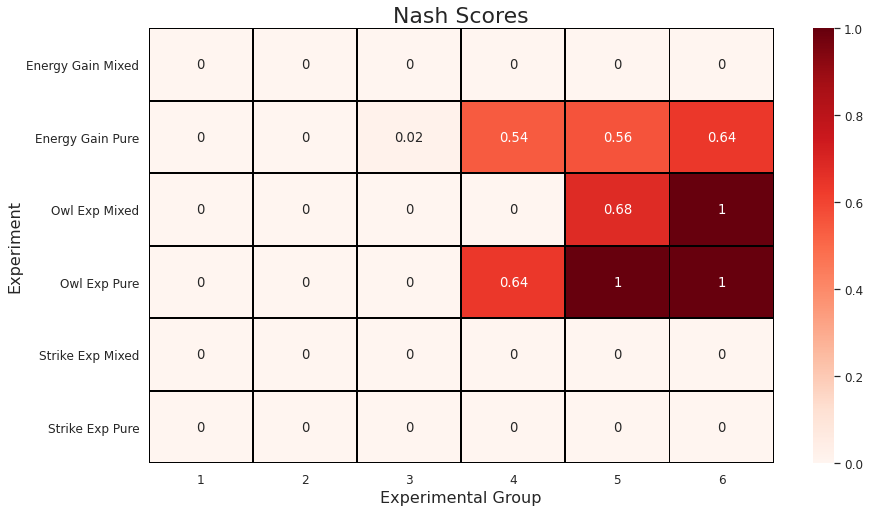

In [60]:
import seaborn as sns
#sns.set_context(rc={'figure.figsize':(30,20)}) 
plt.figure(figsize = (14,8))
sns.set(font_scale=1.1)
ax = sns.heatmap(nash_scores,annot=True,cmap='Reds',linewidths=1, linecolor='black')
ax.axes.set_title("Nash Scores",fontsize=22)
ax.set_xlabel('Experimental Group',fontsize=16)
ax.set_ylabel('Experiment',fontsize=16)
